In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [17]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key

In [21]:
city_counter = 1
city_name = []
lat = []
long = []
temp = []
humidity = []
clouds = []
wind = []
country = []
date = []

print("Beginning Data Retrieval")
print("------------------------------")

for i in cities:
    try:
        city_data = (requests.get(query_url + "&q=" + i)).json()
        city_name.append(city_data["name"])
        lat.append(city_data["coord"]["lat"])
        long.append(city_data["coord"]["lon"])
        temp.append(city_data["main"]["temp"])
        humidity.append(city_data["main"]["humidity"])
        clouds.append(city_data["clouds"]["all"])
        wind.append(city_data["wind"]["speed"])
        country.append(city_data["sys"]["country"])
        date.append(city_data["dt"])
        print("Processing record" + str(city_counter) + "of Set " + str(len(cities)) + " | " +  str(i))
        city_counter = city_counter + 1
    
    except KeyError:
        print("City not found. Skipping...")
        city_counter = city_counter + 1
        
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")
print(cities)

Beginning Data Retrieval
------------------------------
Processing record1of Set 595 | puerto ayora
Processing record2of Set 595 | mecca
Processing record3of Set 595 | new norfolk
Processing record4of Set 595 | bon air
Processing record5of Set 595 | kolpashevo
Processing record6of Set 595 | hilo
Processing record7of Set 595 | hermanus
City not found. Skipping...
City not found. Skipping...
Processing record10of Set 595 | chara
Processing record11of Set 595 | ushuaia
Processing record12of Set 595 | phulji
Processing record13of Set 595 | rikitea
Processing record14of Set 595 | yenagoa
Processing record15of Set 595 | raudeberg
Processing record16of Set 595 | alofi
Processing record17of Set 595 | port macquarie
Processing record18of Set 595 | kondoa
City not found. Skipping...
Processing record20of Set 595 | rodrigues alves
Processing record21of Set 595 | leshukonskoye
Processing record22of Set 595 | havoysund
Processing record23of Set 595 | tasiilaq
Processing record24of Set 595 | muroto


In [25]:
cities_df = pd.DataFrame({"City": city_name,
                          "Latitude": lat,
                          "Longitude": long,
                          "Temperature": temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})

#Save dataframe as csv
pd.DataFrame.to_csv(cities_df, "city_data.csv")

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,Puerto Ayora,0,EC,1609879694,61,-0.7393,-90.3518,298.89,4.60
1,Makkah al Mukarramah,5,SA,1609879501,75,21.4267,39.8261,296.74,2.18
2,New Norfolk,73,AU,1609879694,63,-42.7826,147.0587,287.10,0.89
3,Bon Air,1,US,1609879600,65,37.5249,-77.5578,280.93,3.60
4,Kolpashevo,0,RU,1609879695,84,58.3131,82.9089,242.15,1.06


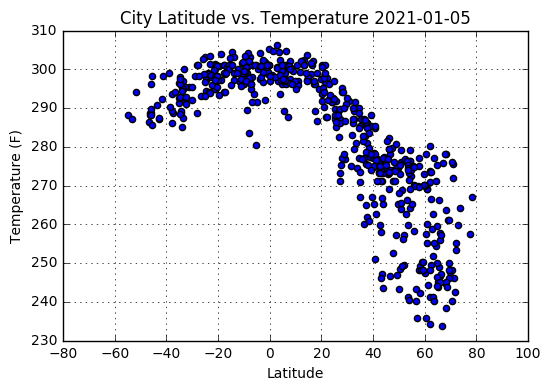

In [42]:
plt.scatter(cities_df["Latitude"], cities_df["Temperature"])
plt.title("City Latitude vs. Temperature " + str(date.today()))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()
plt.grid(True)
plt.savefig("lat_temp.png", bbox_inches="tight")

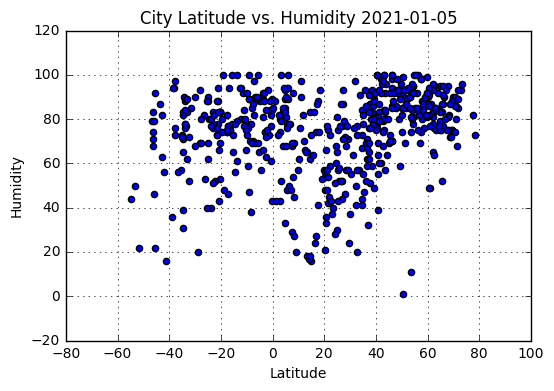

In [43]:
plt.scatter(cities_df["Latitude"], cities_df["Humidity"])
plt.title("City Latitude vs. Humidity " + str(date.today()))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
plt.grid(True)
plt.savefig("lat_humidity.png", bbox_inches="tight")

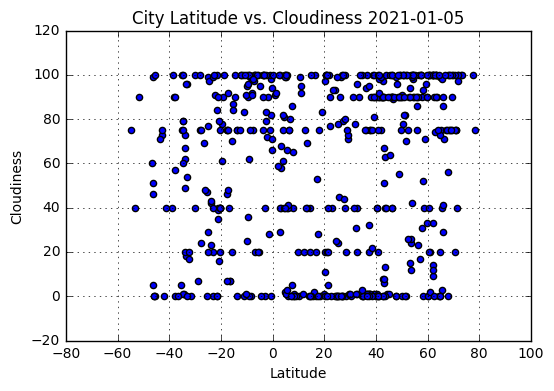

In [44]:
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness " + str(date.today()))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
plt.grid(True)
plt.savefig("lat_cloud.png", bbox_inches="tight")

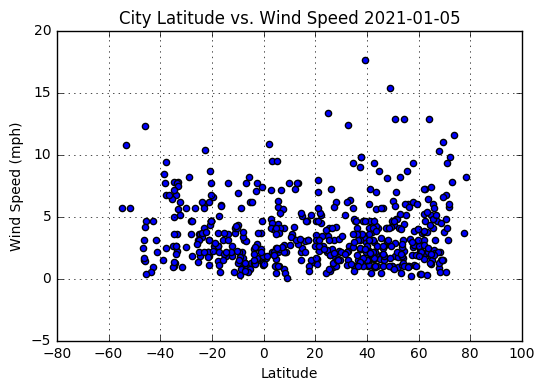

In [45]:
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed " + str(date.today()))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
plt.grid(True)
plt.savefig("lat_wind.png", bbox_inches="tight")

The r value is -0.84
The linear regression line equation is y = -0.75x + 306.15


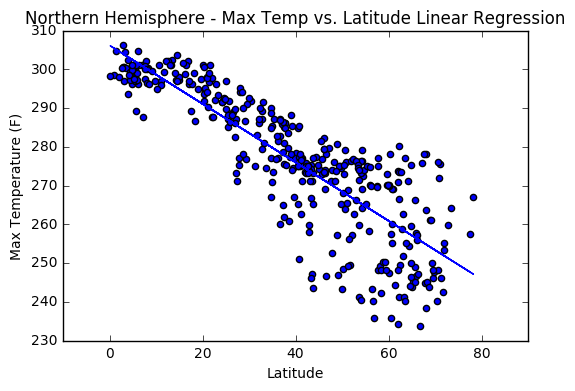

In [53]:
northern_df = cities_df.loc[pd.to_numeric(cities_df["Latitude"]).astype(float) > 0, :]
southern_df = cities_df.loc[pd.to_numeric(cities_df["Latitude"]).astype(float) < 0, :]
xn = pd.to_numeric(northern_df["Latitude"]).astype(float)
yn = pd.to_numeric(northern_df["Temperature"]).astype(float)
plt.scatter(xn, yn)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
correlationN = st.pearsonr(xn,yn)
m, b = np.polyfit(xn, yn, 1)
plt.plot(xn, m*xn + b)
line_eq_N = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The r value is " + str(round(correlationN[0],2)))
print("The linear regression line equation is " + line_eq_N)
plt.show()

The r value is 0.57
The linear regression line equation is y = 0.2x + 300.94


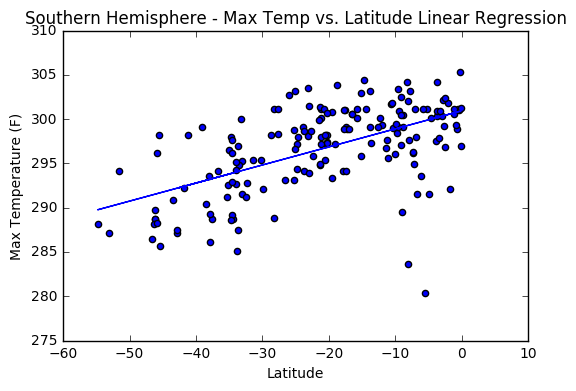

In [54]:
xs = pd.to_numeric(southern_df["Latitude"]).astype(float)
ys = pd.to_numeric(southern_df["Temperature"]).astype(float)
plt.scatter(xs, ys)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
correlationS = st.pearsonr(xs,ys)
m, b = np.polyfit(xs, ys, 1)
plt.plot(xs, m*xs + b)
line_eq_S = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The r value is " + str(round(correlationS[0],2)))
print("The linear regression line equation is " + line_eq_S)
plt.show()

The r value is 0.38
The linear regression line equation is y = 0.4x + 9.57


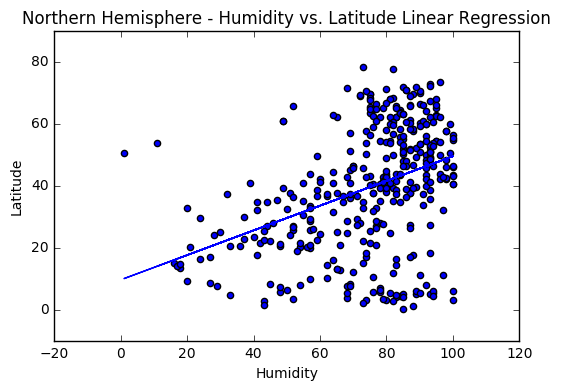

In [55]:
xnh = pd.to_numeric(northern_df["Humidity"]).astype(float)
ynh = pd.to_numeric(northern_df["Latitude"]).astype(float)
plt.scatter(xnh, ynh)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
correlationNH = st.pearsonr(xnh,ynh)
m, b = np.polyfit(xnh, ynh, 1)
plt.plot(xnh, m*xnh + b)
line_eq_NH = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The r value is " + str(round(correlationNH[0],2)))
print("The linear regression line equation is " + line_eq_NH)
plt.show()

The r value is 0.27
The linear regression line equation is y = 0.22x + -37.08


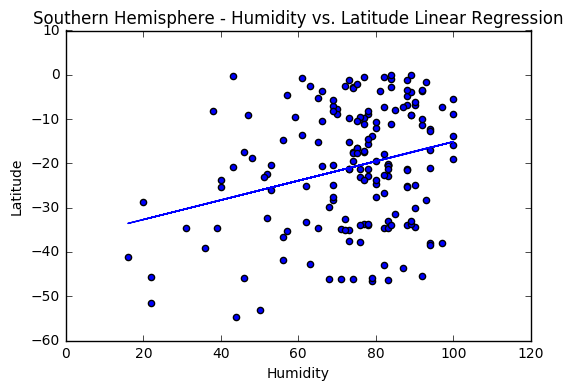

In [56]:
xsh = pd.to_numeric(southern_df["Humidity"]).astype(float)
ysh = pd.to_numeric(southern_df["Latitude"]).astype(float)
plt.scatter(xsh, ysh)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
correlationSH = st.pearsonr(xsh,ysh)
m, b = np.polyfit(xsh, ysh, 1)
plt.plot(xsh, m*xsh + b)
line_eq_SH = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The r value is " + str(round(correlationSH[0],2)))
print("The linear regression line equation is " + line_eq_SH)
plt.show()

The r value is 0.23
The linear regression line equation is y = 0.11x + 32.86


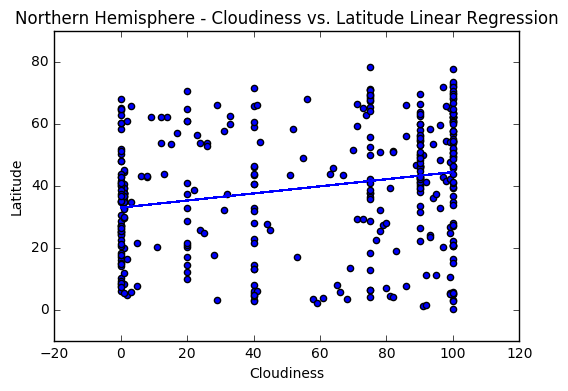

In [57]:
xnc = pd.to_numeric(northern_df["Cloudiness"]).astype(float)
ync = pd.to_numeric(northern_df["Latitude"]).astype(float)
plt.scatter(xnc, ync)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
correlationNC = st.pearsonr(xnc,ync)
m, b = np.polyfit(xnc, ync, 1)
plt.plot(xnc, m*xnc + b)
line_eq_NC = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The r value is " + str(round(correlationNC[0],2)))
print("The linear regression line equation is " + line_eq_NC)
plt.show()

The r value is 0.23
The linear regression line equation is y = 0.09x + -26.12


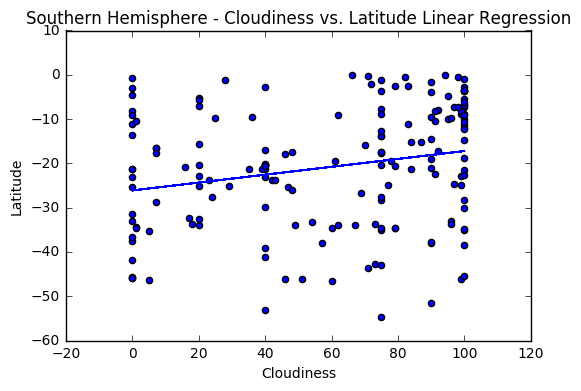

In [58]:
xsc = pd.to_numeric(southern_df["Cloudiness"]).astype(float)
ysc = pd.to_numeric(southern_df["Latitude"]).astype(float)
plt.scatter(xsc, ysc)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
correlationSC = st.pearsonr(xsc,ysc)
m, b = np.polyfit(xsc, ysc, 1)
plt.plot(xsc, m*xsc + b)
line_eq_SC = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The r value is " + str(round(correlationSC[0],2)))
print("The linear regression line equation is " + line_eq_SC)
plt.show()

The r value is 0.07
The linear regression line equation is y = 0.49x + 37.58


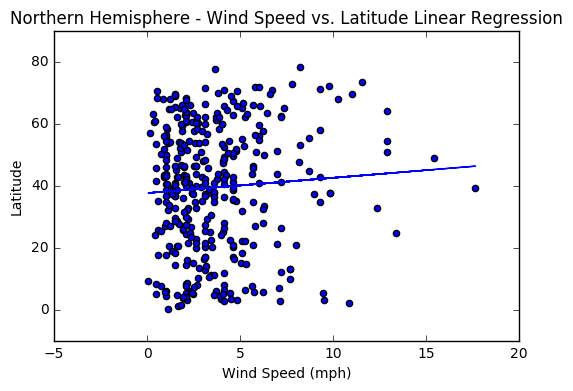

In [59]:
xnw = pd.to_numeric(northern_df["Wind Speed"]).astype(float)
ynw = pd.to_numeric(northern_df["Latitude"]).astype(float)
plt.scatter(xnw, ynw)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
correlationNW = st.pearsonr(xnw,ynw)
m, b = np.polyfit(xnw, ynw, 1)
plt.plot(xnw, m*xnw + b)
line_eq_NW = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The r value is " + str(round(correlationNW[0],2)))
print("The linear regression line equation is " + line_eq_NW)
plt.show()

The r value is -0.25
The linear regression line equation is y = -1.42x + -15.67


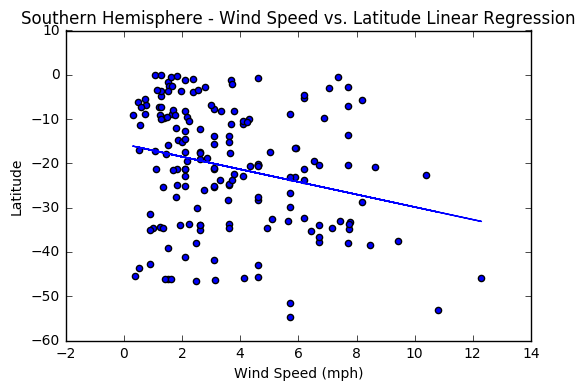

In [60]:
xsw = pd.to_numeric(southern_df["Wind Speed"]).astype(float)
ysw = pd.to_numeric(southern_df["Latitude"]).astype(float)
plt.scatter(xsw, ysw)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
correlationSW = st.pearsonr(xsw,ysw)
m, b = np.polyfit(xsw, ysw, 1)
plt.plot(xsw, m*xsw + b)
line_eq_SW = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The r value is " + str(round(correlationSW[0],2)))
print("The linear regression line equation is " + line_eq_SW)
plt.show()